In [4]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
import matplotlib.pyplot as plt

In [5]:
mp_key = "0xG7dCsc4AADF0PgqeiDeWIJa0gtg1Pd"
mp_id = "mp-9166"

In [103]:
with MPRester(mp_key) as m:
    phonon_band = m.get_phonon_bandstructure_by_material_id(mp_id)


Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# 1) Structure de bande de phonons et trois premières accoustiques

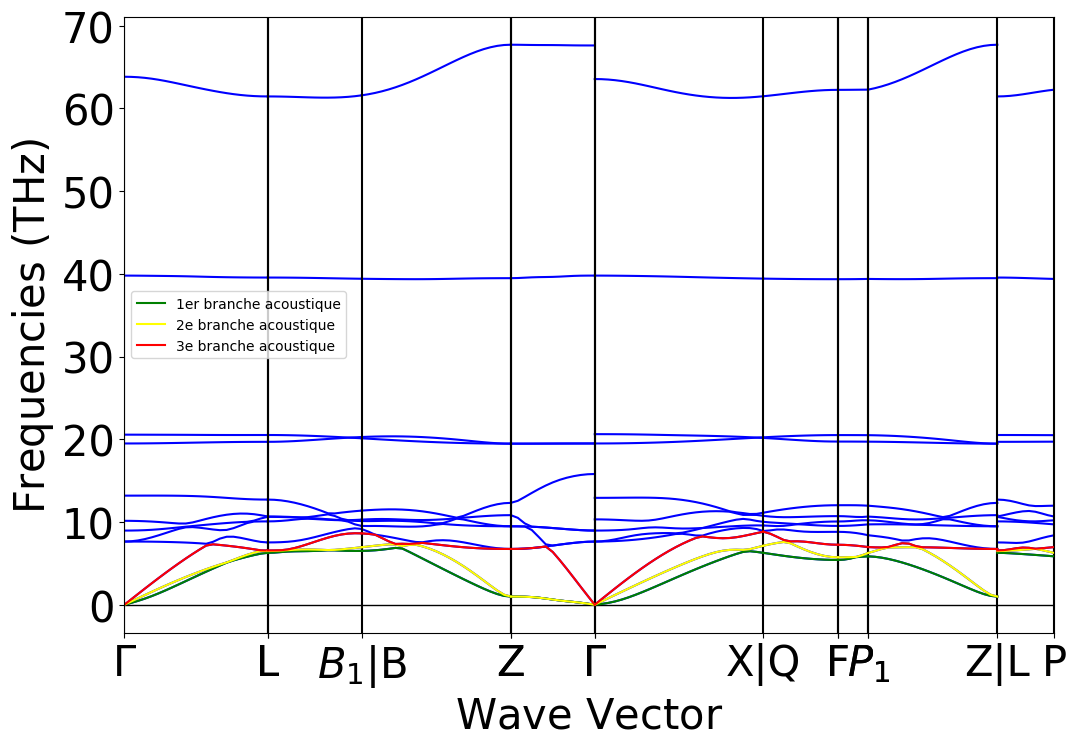

In [110]:
ph_bande = PhononBSPlotter(ph_bs)
ph_bande.get_plot(color='b')
data = ph_bande.bs_plot_data()
freq = data['frequency']
dist = data['distances']

plt.plot(dist[0], freq[0][0], color='green', label='1er branche acoustique')
plt.plot(dist[0], freq[0][1], color='yellow', label='2e branche acoustique')
plt.plot(dist[0], freq[0][2], color='red', label='3e branche acoustique')
for i in range (1,len(dist)):
    plt.plot(dist[i],freq[i][0],color ='green')
    plt.plot(dist[i],freq[i][1], color = 'yellow')
    plt.plot(dist[i],freq[i][2], color = 'red')
plt.legend()




# Zone de Brillouin

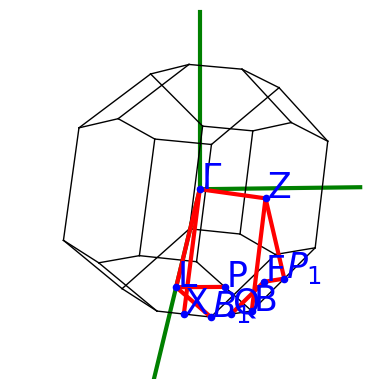

In [8]:
ph_bande.plot_brillouin()

# calcule de la vitesse du son pour trois branches accoustiques 

In [115]:
ph_bande = PhononBSPlotter(ph_bs)
data = ph_bande.bs_plot_data()
distances = data["distances"] 
frequencies = data["frequency"]  
directions = data['ticks']['label']
n = 3 # nombre de couches accoustiques voulues 
def accoustic_branches(frequencies, number): 
    dictio = {'branches': [] , 'zone' : [], 'freq' : []}
    i = 0
    length = len(frequencies)
    size = 0
    while (i != length and size != number ): 
        j = 0 
        while (j != len(frequencies[i]) and size != number): 
            if(frequencies[i][j][0]== 0 and j not in dictio['branches'] and i not in dictio['zone']): 
                dictio['branches'].append(j)
                dictio['zone'].append(i)
                dictio['freq'].append(frequencies[i][j])
                size +=1
            elif(frequencies[i][j][-1]== 0 and j not in dictio['branches'] and i not in dictio['zone']): 
                dictio['branches'].append(j)
                dictio['zone'].append(i)
                dictio['freq'].append(frequencies[i][j])
                size +=1
            j += 1 
        i +=1 
    return dictio

        
x = accoustic_branches(frequencies, n)



In [165]:
#calcule des fréquences et longueur d'onde K pour chaque branches accoustiques
def freq_K(n): 
    Dict ={}
    for i in range(n): 
    ## longueur d'onde K associé au phonon (m)
        k = distances[x['zone'][i]]
    # frequence en THz
        f = frequencies[x['zone'][i]][x['branches'][i]]
        Dict[i] = [f,k]
    return Dict

Dict = freq_K(n)

## calcule des vitesse : 
#rappel : v = dw / dk et w = 2 * pi * f 
def vitesse(f, k): 
    dk = k[1] - k[0]
    dw = 2*np.pi *(f[1]-f[0])
    v = dw/ dk
    if( v < 100): 
        dk = k[-2] - k[-1]
        dw = 2*np.pi *(f[-2]-f[-1])
        v = dw/ dk 
    # facteur de correction: (unités)
    factor = 100
    v *= factor 
    return abs(v)

for i in range (n): 
    if (i ==0):
        print(f" Vitesse du son pour la 1er branche accoustique = {vitesse(Dict[i][0],Dict[i][1])} m/s \n")  
    else :
        print(f" Vitesse du son pour la {i+1}ème branche accoustique = {vitesse(Dict[i][0],Dict[i][1])} m/s \n" )

    
    
    


 Vitesse du son pour la 1er branche accoustique = 1142.3521487481264 m/s 

 Vitesse du son pour la 2ème branche accoustique = 1432.84416284164 m/s 

 Vitesse du son pour la 3ème branche accoustique = 2059.482685797704 m/s 



# Plot des vitesses pour les 3 premières branches accoustiques

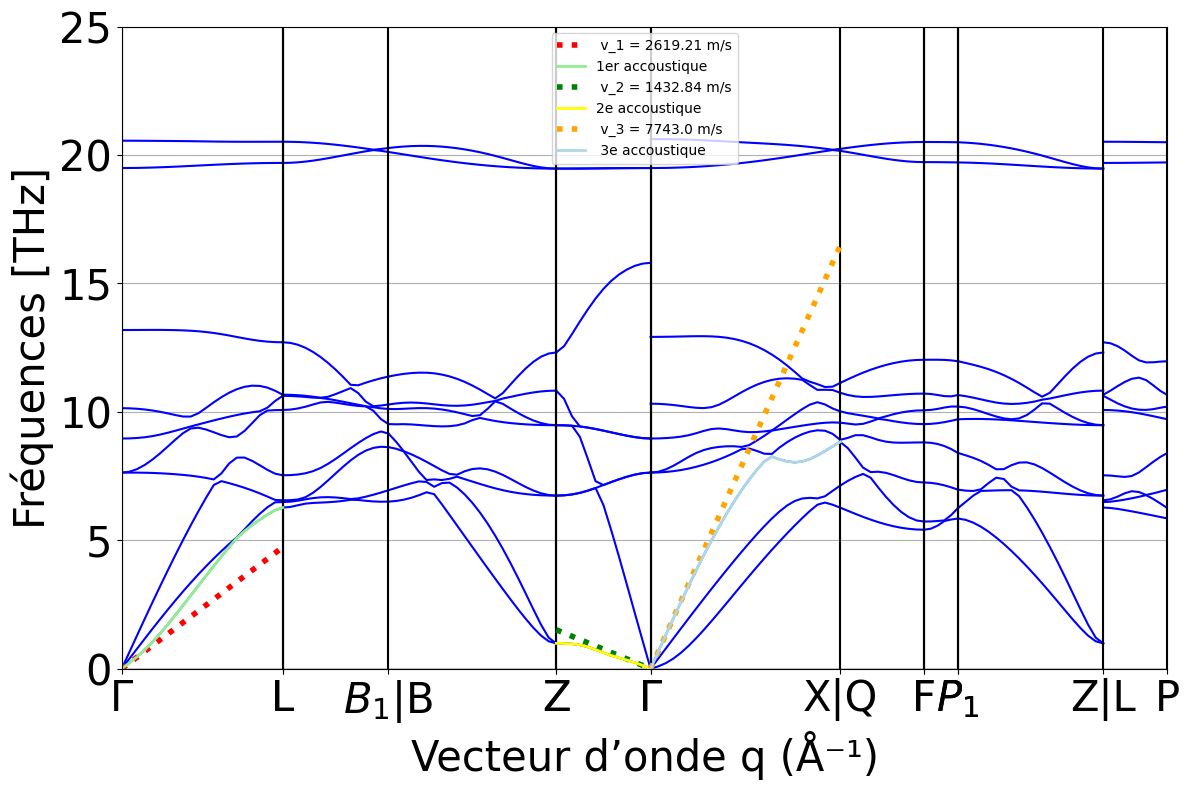

In [164]:
data = ph_bande.bs_plot_data()
dist = data['distances']
fig = ph_bande.get_plot()
ax = plt.gca()
# 1er accoustique
v = vitesse(Dict[0][0],Dict[0][1])
f1 = x['freq'][0]
k1 = dist[x['zone'][0]]
abs1 = np.array([k1[0],k1[1]])
ord1 = np.array([f1[0],f1[1]])
coef1 = np.polyfit(abs1,ord1,1)
a1 = np.linspace(k1[0],k1[-1],1000)
b1 = coef1[0]*a1 + coef1[1]
ax.plot(a1,b1, color='red',lw=4, linestyle =':',label = f" v_1 = {round(v,2)} m/s")
ax.plot(k1, f1,color ='lightgreen', lw = 2, label= '1er accoustique ')
# 2e accoustique 
v = vitesse(Dict[1][0],Dict[1][1])
f2 = x['freq'][1]
k2 = dist[x['zone'][1]]
abs2 = np.array([k2[-1],k2[-2]])
ord2 = np.array([f2[-1],f2[-2]])
coef2= np.polyfit(abs2,ord2,1)
a2 = np.linspace(k2[0],k2[-1],1000)
b2 = coef2[0]*a2+ coef2[1]
ax.plot(a2,b2,color ='green',lw=4, linestyle =':',label = f" v_2 = {round(v,2)} m/s")
ax.plot(k2, f2, color='yellow', lw=2, label="2e accoustique ")
# 3e accoustique 
v = vitesse(Dict[2][0],Dict[2][1])
f3 = x['freq'][2]
k3 = dist[x['zone'][2]]
abs3 = np.array([k3[0], k3[1]])
ord3 = np.array([f3[0], f3[1]])
coef3 = np.polyfit(abs3, ord3, 1)
a3 = np.linspace(k3[0], k3[-1], 1000)
b3 = coef3[0] * a3 + coef3[1]
ax.plot(a3, b3, color='orange',lw=4, linestyle =':',label = f" v_3 = {round(v,2)} m/s")
ax.plot(k3, f3, color='lightblue', lw=2, label=" 3e accoustique")
plt.legend()
plt.xlabel("Vecteur d’onde q (Å⁻¹)")
plt.ylabel("Fréquences [THz]")
plt.ylim(0,25)
plt.grid(True)
plt.tight_layout()
plt.show()